## 당신이 NO SHOW 할 확률은?

## 탐구 주제

## 1) 신체적 특성(나이, 질병, 장애)들이 No_show 여부에 영향을 미치는가?
나이가 많거나 질병을 가지고 있거나 장애를 가진 사람들은 자신의 몸을 걱정해서 No_show 할 확률이 적을 것이다.

## 2) 사회적 지위(Scholarship)가 No_show 여부에 영향을 미치는가?
Scolarship = 1 즉, 가난한 사람일수록 의료적 지원이 크기 때문에 No_show 할 확률이 적을 것이다.

## 3) 예약 확인 문자(SMS_received) 수신 여부가 No_show 여부에 영향을 미치는가?
예약 확인 문자를 통해 진료가 있음을  rewind 해줌으로 No_show 할 확률이 적을 것이다.

## 4) 대기 기간(Wait_day)이 No_show 여부에 영향을 미치는가?
대기시간이 길면 진료예약을 잊을 확률이 높아짐으로 No_show 할 확률이 높아질 것이다.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision %.3f
%matplotlib inline

#데이터 읽기
data = pd.read_csv("NO_show.csv")

The data set provides us with 14 columns:

1-Patient_Id: Identification of a patient.

2-Appointment_ID: Identification of each appointment

3-Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

4-Scheduled_Date: The day someone called or registered the appointment, this is before appointment of course.

5-Appiontment_Date: The day of the actuall appointment, when they have to visit the doctor.

6-Age: How old is the patient.

7-Neighbourhood: Where the appointment takes place.

8-Scholarship: True of False and it's kinda of health care program.

9-Hyper_tension:True or False.

10 Diabetes: True or False.

11-Alcoholism: True or False.

12-Handicap: True or False. Disabilities

13-SMS_received:1 or more messages sent to the patient.

14-No-show: True or False. it's True when the patient didn't attend.

In [2]:
# 잘못된 열 rename.
data.rename(columns={"Hipertension": "Hypertension",
                     "ScheduledDay": "Scheduled_day","AppointmentDay":"Appointment_day", 
                     "Handcap":"Handicap"}, inplace=True)

In [3]:
# 결측값 확인.
data.isnull().sum()

PatientId          0
AppointmentID      0
Gender             0
Scheduled_day      0
Appointment_day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No-show            0
dtype: int64

In [4]:
# 중복값 확인.
data.duplicated().sum()

0

In [5]:
# No_Show를 했으면 1, 아니면 0으로 설정.
data['No_Show'] = [1 if b == 'Yes' else 0 for b in data['No-show']]
data.head()

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


## 1) 신체적 특성(나이, 질병, 장애)들이 No_show 여부에 영향을 미치는가?
나이가 많거나 질병을 가지고 있거나 장애를 가진 사람들은 자신의 몸을 걱정해서 No_show 할 확률이 적을 것이다.

1. 나이

In [6]:
mod_age = smf.glm(formula = "No_Show~ Age", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_age.aic,'Parameter:', mod_age.params, sep='\n')

AIC:
110805.24020869004
Parameter:
Intercept   -1.137712
Age         -0.006562
dtype: float64


2. 질병

In [7]:
mod_Hyper = smf.glm(formula = "No_Show~ Hypertension", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Hyper.aic,'Parameter:', mod_Hyper.params, sep='\n')

AIC:
111064.59827011601
Parameter:
Intercept      -1.330741
Hypertension   -0.233635
dtype: float64


In [8]:
mod_Diab = smf.glm(formula = "No_Show~ Diabetes", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Diab.aic,'Parameter:', mod_Diab.params, sep='\n')

AIC:
111183.46502862276
Parameter:
Intercept   -1.363770
Diabetes    -0.152356
dtype: float64


In [9]:
mod_Alcoh = smf.glm(formula = "No_Show~ Alcoholism", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Alcoh.aic,'Parameter:', mod_Alcoh.params, sep='\n')

AIC:
111209.60426682547
Parameter:
Intercept    -1.374173
Alcoholism   -0.002847
dtype: float64


3. 장애

In [10]:
mod_Handi = smf.glm(formula = "No_Show~ Handicap", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Handi.aic,'Parameter:', mod_Handi.params, sep='\n')

AIC:
111205.42044296555
Parameter:
Intercept   -1.372165
Handicap    -0.097465
dtype: float64


## 2) 사회적 지위(Scholarship)가 No_show 여부에 영향을 미치는가?
Scolarship = 1 즉, 가난한 사람일수록 의료적 지원이 크기 때문에 No_show 할 확률이 적을 것이다.

In [11]:
mod_Schol = smf.glm(formula = "No_Show~ Scholarship", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Schol.aic,'Parameter:', mod_Schol.params, sep='\n')

AIC:
111119.11980587793
Parameter:
Intercept     -1.398391
Scholarship    0.231200
dtype: float64


## 3) 예약 확인 문자(SMS_received) 수신 여부가 No_show 여부에 영향을 미치는가?
예약 확인 문자를 통해 진료가 있음을  rewind 해줌으로 No_show 할 확률이 적을 것이다.

In [12]:
mod_SMS = smf.glm(formula = "No_Show~ SMS_received", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_SMS.aic,'Parameter:', mod_SMS.params, sep='\n')

AIC:
109507.16997636681
Parameter:
Intercept      -1.606802
SMS_received    0.641137
dtype: float64


## 4) 대기 기간(Wait_day)이 No_show 여부에 영향을 미치는가?
대기시간이 길면 진료예약을 잊을 확률이 높아짐으로 No_show 할 확률이 높아질 것이다.

In [13]:
# 대기시간 구하기.
from datetime import date

d0 = pd.DatetimeIndex(data['Scheduled_day']).date 
d1 = pd.DatetimeIndex(data['Appointment_day']).date
delta = d1 - d0 
data['between'] = delta
data['Wait_day']=0
for i in range (110527):
    x = np.timedelta64(data['between'][i], 'ns')
    days = x.astype('timedelta64[D]')
    data['Wait_day'][i] = abs(days / np.timedelta64(1, 'D'))

C:\Users\jenny\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [14]:
data.head()

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days,0


In [15]:
mod_Wait = smf.glm(formula = "No_Show~ Wait_day", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Wait.aic,'Parameter:', mod_Wait.params, sep='\n')

AIC:
107865.43117588689
Parameter:
Intercept   -1.677594
Wait_day     0.025859
dtype: float64


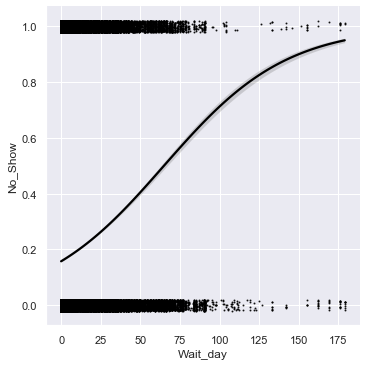

In [16]:
sns.lmplot(x = "Wait_day", y = "No_Show",data = data, logistic = True, 
           scatter_kws = {"color": "black",'s':1},line_kws = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

In [17]:
condition_list = [(data['Wait_day'] < 10) & (data['Wait_day'] > 0),(data['Wait_day'] < 20) & (data['Wait_day'] >= 10),(data['Wait_day'] < 30) & (data['Wait_day'] >= 20),(data['Wait_day']< 40) & (data['Wait_day']>= 30),
                  (data['Wait_day']< 50) & (data['Wait_day'] >= 40),(data['Wait_day'] < 60) & (data['Wait_day'] >= 50),(data['Wait_day'] < 70) & (data['Wait_day'] >= 60),(data['Wait_day'] < 80) & (data['Wait_day'] >= 70),
                  (data['Wait_day'] < 90) & (data['Wait_day'] >= 80),(data['Wait_day'] < 100) & (data['Wait_day'] >= 90),(data['Wait_day'] < 110) & (data['Wait_day'] >= 100),(data['Wait_day'] < 120) & (data['Wait_day'] >= 110),
                  (data['Wait_day'] < 130) & (data['Wait_day'] >= 120),(data['Wait_day'] < 140) & (data['Wait_day']>= 130),(data['Wait_day'] < 150) & (data['Wait_day'] >= 140),(data['Wait_day'] < 160) & (data['Wait_day'] >= 150),
                  (data['Wait_day'] < 170) & (data['Wait_day'] >= 160),(data['Wait_day'] < 180) & (data['Wait_day'] >= 170)]
choice_list = [ 'g11', 'g12', 'g13','g14', 'g15', 'g16','g17', 'g18','g19', 'g21', 'g22','g23', 'g24', 'g25','g26', 'g27','g28','g29']
data['groupB'] = np.select(condition_list, choice_list, default = 'NaN')
data.head()

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day,groupB
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days,0,NaN
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days,0,NaN
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days,0,NaN
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days,0,NaN
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days,0,NaN


In [18]:
index_d = data[data['groupB'] == 'NaN'].index
N_data = data.drop(index_d)
N_data

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day,groupB
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0,2 days,2,g11
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2 days,2,g11
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2 days,2,g11
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0,2 days,2,g11
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0,2 days,2,g11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,35 days,35,g14
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,35 days,35,g14
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,41 days,41,g15
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,41 days,41,g15


In [19]:
group1 = N_data.groupby("groupB")
a = group1['No_Show'].sum()
a

groupB
g11    8887
g12    4432
g13    3596
g14    1877
g15     737
g16     371
g17     336
g18     170
g19      51
g21      29
g22      10
g23       2
g24       1
g25       6
g26       4
g27       7
g28       3
g29       8
Name: No_Show, dtype: int64

In [20]:
pd.crosstab(N_data.groupB, N_data.No_Show)

No_Show,0,1
groupB,,
g11,27240,8887
g12,9482,4432
g13,7245,3596
g14,3771,1877
g15,1387,737
g16,771,371
g17,837,336
g18,367,170
g19,132,51


In [21]:
b = group1['No_Show'].mean()
b

groupB
g11    0.245993
g12    0.318528
g13    0.331704
g14    0.332330
g15    0.346987
g16    0.324869
g17    0.286445
g18    0.316574
g19    0.278689
g21    0.211679
g22    0.294118
g23    0.105263
g24    0.142857
g25    0.461538
g26    0.444444
g27    0.636364
g28    0.157895
g29    0.307692
Name: No_Show, dtype: float64

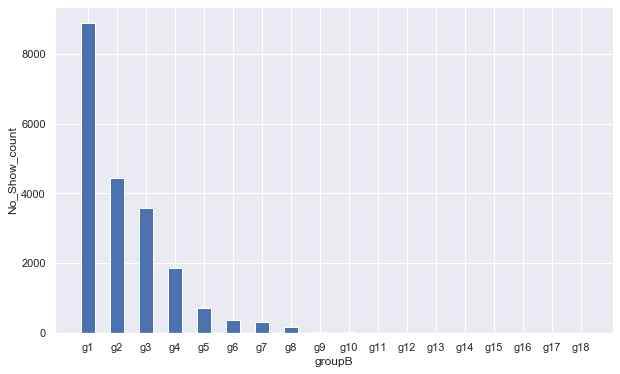

In [22]:
# 대상 데이터
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, a.values, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, [ 'g1', 'g2', 'g3','g4', 'g5', 'g6','g7', 'g8','g9', 'g10', 'g11','g12', 'g13', 'g14','g15', 'g16','g17','g18'])

# x와 y 레이블 설정
plt.xlabel('groupB')
plt.ylabel('No_Show_count')
plt.grid(True)

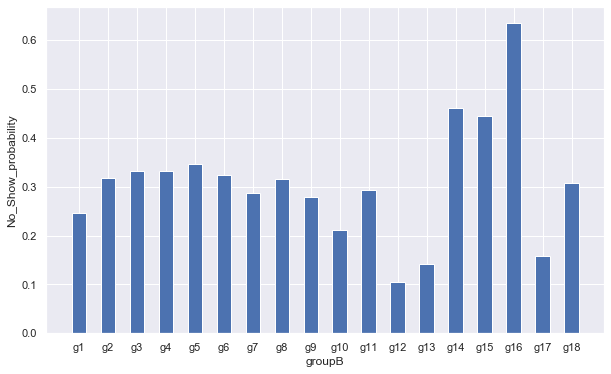

In [23]:
# 대상 데이터
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, b.values, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, [ 'g1', 'g2', 'g3','g4', 'g5', 'g6','g7', 'g8','g9', 'g10', 'g11','g12', 'g13', 'g14','g15', 'g16','g17','g18'])

# x와 y 레이블 설정
plt.xlabel('groupB')
plt.ylabel('No_Show_probability')
plt.grid(True)

In [24]:
mod_Wait = smf.glm(formula = "No_Show~ Wait_day", data = N_data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Wait.aic,'Parameter:', mod_Wait.params, sep='\n')

AIC:
85796.944997355
Parameter:
Intercept   -1.042291
Wait_day     0.007701
dtype: float64


(wait_day가 0 인 것을 제외하기 전)Wait_day, SMS_received, Age, Hypertension, Scholarship, Diabetes, Handicap, Alcoholism 순으로 AIC값이 낮다.

In [25]:
mod_age = smf.glm(formula = "No_Show~ Age", data = N_data, family=sm.families.Binomial()).fit()
mod_Hyper = smf.glm(formula = "No_Show~ Hypertension", data = N_data, family=sm.families.Binomial()).fit()
mod_Diab = smf.glm(formula = "No_Show~ Diabetes", data = N_data, family=sm.families.Binomial()).fit()
mod_Alcoh = smf.glm(formula = "No_Show~ Alcoholism", data = N_data, family=sm.families.Binomial()).fit()
mod_Handi = smf.glm(formula = "No_Show~ Handicap", data = N_data, family=sm.families.Binomial()).fit()
mod_Schol = smf.glm(formula = "No_Show~ Scholarship", data = N_data, family=sm.families.Binomial()).fit()
mod_SMS = smf.glm(formula = "No_Show~ SMS_received", data = N_data, family=sm.families.Binomial()).fit()
mod_Wait = smf.glm(formula = "No_Show~ Wait_day", data = N_data, family=sm.families.Binomial()).fit()
print('AIC:',mod_age.aic,mod_Hyper.aic,mod_Diab.aic,mod_Alcoh.aic,mod_Handi.aic,mod_Schol.aic,mod_SMS.aic,mod_Wait.aic)

AIC: 85309.68300665826 85809.19077076924 86011.94833204718 86021.71510393958 86045.59155993829 85904.4520426481 86018.14019020775 85796.944997355


(Wait_day=0을 제외한 후) 
Age, Wait_day, Hypertension, Scholarship, Diabetes, SMS_received, Alcoholism, Handicap 순으로 AIC값이 낮다.

In [26]:
# AIC값이 작은 수부터 모델을 만들어서 NULL모델과 비교.
opt_null= smf.glm(formula = "No_Show~ 1", data = N_data, family=sm.families.Binomial()).fit()
opt_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71963
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43023.
Date:                Tue, 08 Jun 2021   Deviance:                       86045.
Time:                        18:19:28   Pearson chi2:                 7.20e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9186      0.008   -111.270      0.000      -0.935      -0.902
==============================================================================
"""

In [27]:
opt_null.aic

86047.09637798123

In [28]:
opt_mod1= smf.glm(formula = "No_Show~ Age", data = N_data, family=sm.families.Binomial()).fit()
opt_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71962
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42653.
Date:                Tue, 08 Jun 2021   Deviance:                       85306.
Time:                        18:19:29   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5494      0.016    -35.102      0.000      -0.580      -0.519
Age           -0.0099      0.000    -26.995      0.000      -0.011      -0.009
==============================================================================
"""

In [29]:
opt_mod1.aic

85309.68300665826

In [30]:
opt_mod2= smf.glm(formula = "No_Show~ Age + Wait_day", data = N_data, family=sm.families.Binomial()).fit()
opt_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71961
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42527.
Date:                Tue, 08 Jun 2021   Deviance:                       85054.
Time:                        18:19:29   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6746      0.018    -38.514      0.000      -0.709      -0.640
Age           -0.0099      0.000    -26.986      0.000      -0.011      -0.009
Wait_day       0.0078      0.000     16.061      0.000       0.007       0.009
==============================================================================
"""

In [31]:
opt_mod2.aic

85060.05341178557

In [32]:
opt_mod3= smf.glm(formula = "No_Show~ Age + Wait_day + Hypertension", data = N_data, family=sm.families.Binomial()).fit()
opt_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71960
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42526.
Date:                Tue, 08 Jun 2021   Deviance:                       85052.
Time:                        18:19:29   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6785      0.018    -38.295      0.000      -0.713      -0.644
Age             -0.0096      0.000    -22.658      0.000      -0.010      -0.009
Wait_day         0.0078      0.000     15.968      0.000       0.007       0.009
Hypertension    -0.0359      0.025     -1.456      0.145      -0.084       0.012
================================================================================
"""

In [33]:
opt_mod3.aic

85059.93084404618

In [34]:
opt_mod4= smf.glm(formula = "No_Show~ Age + Wait_day + Hypertension + Scholarship", 
                  data = N_data, family=sm.families.Binomial()).fit()
opt_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71959
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42477.
Date:                Tue, 08 Jun 2021   Deviance:                       84953.
Time:                        18:19:30   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7212      0.018    -39.446      0.000      -0.757      -0.685
Age             -0.0092      0.000    -21.622      0.000      -0.010      -0.008
Wait_day         0.0079      0.000     16.253      0.000       0.007       0.009
Hypertension    -0.0421      0.025     -1.705      0.088      -0.091       0.006
Scholarship      0.2752      0.027     10.048      0.000       0.222       0.329
================================================================================
"""

In [35]:
opt_mod4.aic

84963.2604667886

In [36]:
opt_mod5= smf.glm(formula = "No_Show~ Age + Wait_day + Hypertension + Scholarship + Diabetes", 
                  data = N_data, family=sm.families.Binomial()).fit()
opt_mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71958
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42471.
Date:                Tue, 08 Jun 2021   Deviance:                       84943.
Time:                        18:19:31   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7200      0.018    -39.370      0.000      -0.756      -0.684
Age             -0.0093      0.000    -21.822      0.000      -0.010      -0.008
Wait_day         0.0080      0.000     16.346      0.000       0.007       0.009
Hypertension    -0.0712      0.026     -2.701      0.007      -0.123      -0.020
Scholarship      0.2758      0.027     10.071      0.000       0.222       0.330
Diabetes         0.1188      0.037      3.245      0.001       0.047       0.191
================================================================================
"""

In [37]:
opt_mod5.aic

84954.83259356274

In [38]:
opt_mod6= smf.glm(formula = "No_Show~ Age + Wait_day + Hypertension + Scholarship + Diabetes + SMS_received", 
                  data = N_data, family=sm.families.Binomial()).fit()
opt_mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71957
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42419.
Date:                Tue, 08 Jun 2021   Deviance:                       84838.
Time:                        18:19:31   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6465      0.020    -33.003      0.000      -0.685      -0.608
Age             -0.0094      0.000    -22.096      0.000      -0.010      -0.009
Wait_day         0.0090      0.000     18.074      0.000       0.008       0.010
Hypertension    -0.0728      0.026     -2.759      0.006      -0.124      -0.021
Scholarship      0.2829      0.027     10.317      0.000       0.229       0.337
Diabetes         0.1158      0.037      3.162      0.002       0.044       0.188
SMS_received    -0.1743      0.017    -10.238      0.000      -0.208      -0.141
================================================================================
"""

In [39]:
opt_mod6.aic

84851.78745353791

In [40]:
opt_mod7= smf.glm(formula = "No_Show~  Age + Wait_day + Hypertension + Scholarship + Diabetes + SMS_received + Alcoholism", 
                  data = N_data, family=sm.families.Binomial()).fit()
opt_mod7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71956
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42388.
Date:                Tue, 08 Jun 2021   Deviance:                       84775.
Time:                        18:19:32   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6492      0.020    -33.111      0.000      -0.688      -0.611
Age             -0.0096      0.000    -22.494      0.000      -0.010      -0.009
Wait_day         0.0091      0.000     18.282      0.000       0.008       0.010
Hypertension    -0.0844      0.026     -3.192      0.001      -0.136      -0.033
Scholarship      0.2746      0.027     10.002      0.000       0.221       0.328
Diabetes         0.1217      0.037      3.319      0.001       0.050       0.194
SMS_received    -0.1743      0.017    -10.236      0.000      -0.208      -0.141
Alcoholism       0.4106      0.051      8.073      0.000       0.311       0.510
================================================================================
"""

In [41]:
opt_mod7.aic

84791.37973153389

In [42]:
opt_mod8= smf.glm(formula = "No_Show~  Age + Wait_day + Hypertension + Scholarship + Diabetes + SMS_received + Alcoholism + Handicap", 
                  data = N_data, family=sm.families.Binomial()).fit()
opt_mod8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:                71964
Model:                            GLM   Df Residuals:                    71955
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42388.
Date:                Tue, 08 Jun 2021   Deviance:                       84775.
Time:                        18:19:33   Pearson chi2:                 7.19e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6493      0.020    -33.109      0.000      -0.688      -0.611
Age             -0.0096      0.000    -22.488      0.000      -0.010      -0.009
Wait_day         0.0091      0.000     18.283      0.000       0.008       0.010
Hypertension    -0.0846      0.026     -3.200      0.001      -0.136      -0.033
Scholarship      0.2746      0.027     10.003      0.000       0.221       0.328
Diabetes         0.1214      0.037      3.312      0.001       0.050       0.193
SMS_received    -0.1743      0.017    -10.231      0.000      -0.208      -0.141
Alcoholism       0.4105      0.051      8.072      0.000       0.311       0.510
Handicap         0.0146      0.056      0.263      0.792      -0.094       0.124
================================================================================
"""

In [43]:
opt_mod8.aic

84793.31065054824

In [44]:
''' AIC값이 가장 작은 모델 = (Paramete가 Age + Wait_day + Hypertension + Scholarship + Diabetes + SMS_received + Alcoholism + Handicap)에서
p값이 0.05보다 큰 parameter(=Handicap) 제거.'''
opt_mod_final = opt_mod7 

### +) Predict 해보기

In [45]:
a = opt_mod_final.predict()
b = list(a)
N_data['predicted_No_Show'] = [1 if c >= 0.5 else 0 for c in b]
N_data

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day,groupB,predicted_No_Show
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0,2 days,2,g11,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2 days,2,g11,0
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2 days,2,g11,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0,2 days,2,g11,0
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0,2 days,2,g11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,35 days,35,g14,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,35 days,35,g14,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,41 days,41,g15,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,41 days,41,g15,0


In [46]:
len(N_data[N_data.No_Show!=N_data.predicted_No_Show])/len(N_data)

0.285

예측율이 약 72%정도이다.

In [47]:
a = input('당신의 예약을 잡은 날은? ex.2021-06-04 ')
b = input('당신의 예약날은? ex.2021-10-04 ')
c = input('예약된 병원은 예약 전에 문자를 해주나요?(네/아니요) ')
d = input('당신의 나이는?(숫자만 입력할것) ')
e = input('사회의 지원을 받는 가정인가요?(네/아니요) ')
f = input('당신은 알코올 의존증이 있는가?(네/아니요) ')
g = input('당신은 당뇨병이라는 질환을 가지고 있나요?(네/아니요) ')
h = input('당신은 고혈압이라는 질환을 가지고 있나요?(네/아니요) ')

from datetime import datetime

d0 = datetime.strptime(a, "%Y-%m-%d")
d1 = datetime.strptime(b, "%Y-%m-%d")
delta = d1 - d0 

x = np.timedelta64(delta, 'ns')
days = x.astype('timedelta64[D]')
N_days = abs(days / np.timedelta64(1, 'D'))
N_days

if c == '네':
    c = 1
else:
    c = 0
if e == '네':
    e = 1
else:
    e = 0 
if f == '네':
    f = 1
else:
    f = 0
if g == '네':
    g = 1
else:
    g = 0
if h == '네':
    h = 1
else:
    h = 0
    
raw_data = {'Wait_day': N_days,'SMS_received': c,'Age': int(d),'Scholarship': e,
            'Alcoholism':f,'Diabetes':g,'Hypertension':h}
data_1 = pd.DataFrame(raw_data,index = [0])

당신의 예약을 잡은 날은? ex.2021-06-04 2021-06-04
당신의 예약날은? ex.2021-10-04 2021-10-04
예약된 병원은 예약 전에 문자를 해주나요?(네/아니요) 네
당신의 나이는?(숫자만 입력할것) 21
사회의 지원을 받는 가정인가요?(네/아니요) 아니요
당신은 알코올 의존증이 있는가?(네/아니요) 아니요
당신은 당뇨병이라는 질환을 가지고 있나요?(네/아니요) 아니요
당신은 고혈압이라는 질환을 가지고 있나요?(네/아니요) 아니요


In [48]:
data_1

,Wait_day,SMS_received,Age,Scholarship,Alcoholism,Diabetes,Hypertension
0,122.0,1,21,0,0,0,0


In [49]:
opt_mod_final.predict(data_1)

0    0.520412
dtype: float64

## 결론
### 1. 나이가 많거나 질병이 있거나 장애가 있으면 No_Show할 가능성이 낮다.
### 2. 예상과 다르게 사회적 지원을 받는 사람들이 No_Show할 가능성이 높다.
### 3. 예상과 달리 예약 확인을 받은 사람이 No_Show할 가능성이 높다.
### 4. Wait_day는 Wait_day의 일수가 늘어나면 늘어날 수록 No_show할 가능성이 높아진다. ((Wait_day = 0) 제외)